In [ ]:
import pandas as pd

C:\Users\munzu\AppData\Local\Temp\ipykernel_1788\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
file_path = 'data/listings_cleaned.csv.gz'
df = pd.read_csv(file_path, index_col=0, compression='gzip')

#handle NaN values
df.fillna(df.median(), inplace=True)

df.head()

,host_since,host_response_time,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,beds,amenities,...,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster,Entire home/apt,Hotel room,Private room,Shared room
id,,,,,,,,,,,,,,,,,,,,,
56229,5298.0,3.0,0,11.0,1,1,2,1.5,1.0,24,...,0,0,0,0,0,0,1,0,0,0
62970,5169.0,2.0,1,47.0,1,1,6,3.0,3.0,28,...,0,0,1,0,0,0,1,0,0,0
63948,5298.0,3.0,0,11.0,1,1,2,1.0,1.0,19,...,0,0,0,0,0,0,1,0,0,0
66772,5298.0,3.0,0,11.0,1,1,2,1.0,1.0,27,...,0,0,0,0,0,0,0,0,1,0
69198,5161.0,1.0,0,1.0,1,1,1,1.0,1.0,13,...,0,0,0,0,0,0,0,0,1,0


In [11]:
target = 'price'

features = [
    'host_since',
    'host_response_time',
    'host_is_superhost',
    'host_total_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'accommodates',
    'bathrooms',
    'beds',
    'amenities',
    'minimum_nights',
    'maximum_nights',
    'number_of_reviews',
    'first_review',
    'review_scores_rating',
    'instant_bookable',
    'reviews_per_month',
    'Barking and Dagenham',
    'Barnet',
    'Bexley',
    'Brent',
    'Bromley',
    'Camden',
    'City of London',
    'Croydon',
    'Ealing',
    'Enfield',
    'Greenwich',
    'Hackney',
    'Hammersmith and Fulham',
    'Haringey',
    'Harrow',
    'Havering',
    'Hillingdon',
    'Hounslow',
    'Islington',
    'Kensington and Chelsea',
    'Kingston upon Thames',
    'Lambeth',
    'Lewisham',
    'Merton',
    'Newham',
    'Redbridge',
    'Richmond upon Thames',
    'Southwark',
    'Sutton',
    'Tower Hamlets',
    'Waltham Forest',
    'Wandsworth',
    'Westminster',
    'Entire home/apt',
    'Hotel room',
    'Private room',
    'Shared room'
    ]

x = df[features]
y = df[target]

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

LinearRegression()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr_model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 62.960561266468346
MSE: 10990.775462139145
R2: 0.49963144482352273


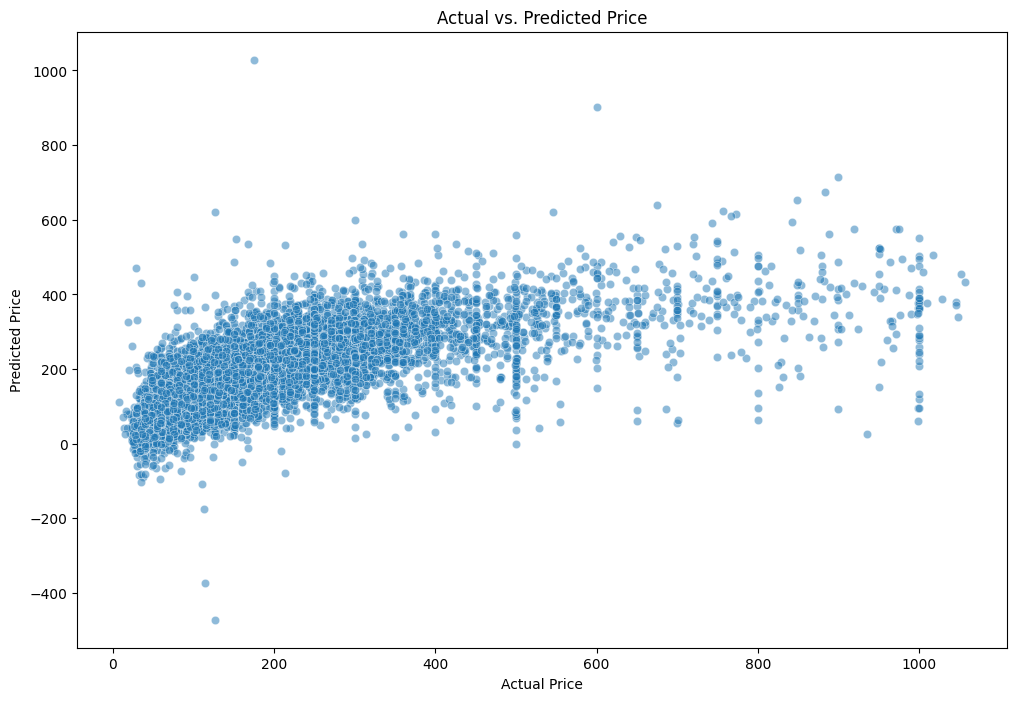

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()